# Ball Tracking
### Team Catan 

##### Read and show the video file

In [48]:
import cv2

cap = cv2.VideoCapture('recordings/Camera0_007.mp4')

if not cap.isOpened():
    print("Error opening video stream or file")

else:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imshow('Frame', frame)
        if cv2.waitKey(30) & 0xFF == 27:  # Press 'Esc' to exit
            break
            
cap.release()
cv2.destroyAllWindows()

#### Detect the red ball and show

In [49]:
import numpy as np

cap = cv2.VideoCapture('recordings/Camera0_007.mp4')

detected_ball = None
lower_red = np.array([0, 0, 100], dtype=np.uint8)
upper_red = np.array([75, 75, 255], dtype=np.uint8)
x=0

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        break
    # Create a mask to isolate the red color
    mask = cv2.inRange(frame, lower_red, upper_red)
    # Apply the mask to the frame to detect the red color
    detected_ball = cv2.bitwise_and(frame, frame, mask=mask)
    #   cv2.imshow('Current Frame', frame)
    cv2.imshow('Detected Ball', detected_ball)
    last_frame = frame
    if x == 100:
        middle_frame = frame
    x += 1
    if cv2.waitKey(25) & 0xFF == ord('q'): # Press q to exit
        break

cap.release()
cv2.destroyAllWindows()

#### Show the amount of frames in the video

In [50]:
cap = cv2.VideoCapture('recordings/Camera0_007.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
length

262

#### Get the coordinate of the middle of the ball   

In [51]:
# get the x and y coordinates of the middle of the ball between upper and lower red
Y, X = np.where(np.all(detected_ball > lower_red, axis=-1) & np.all(detected_ball < upper_red, axis=-1))
coordinates = np.column_stack((X, Y))

In [56]:
median_x = []
median_y = []
cap = cv2.VideoCapture('recordings/Camera0_007.mp4')

lower_red = np.array([0, 0, 100], dtype=np.uint8)
upper_red = np.array([75, 75, 255], dtype=np.uint8)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    mask = cv2.inRange(frame, lower_red, upper_red)
    detected_ball = cv2.bitwise_and(frame, frame, mask=mask)
    Y, X = np.where(np.all(detected_ball > lower_red, axis=-1) & np.all(detected_ball < upper_red, axis=-1))
    coordinates = np.column_stack((X, Y))
    if len(coordinates) > 0:
        median_x.append(np.median(coordinates[:, 0]))
        median_y.append(np.median(coordinates[:, 1]))
cap.release()
cv2.destroyAllWindows()

### Show the trajectory of the ball

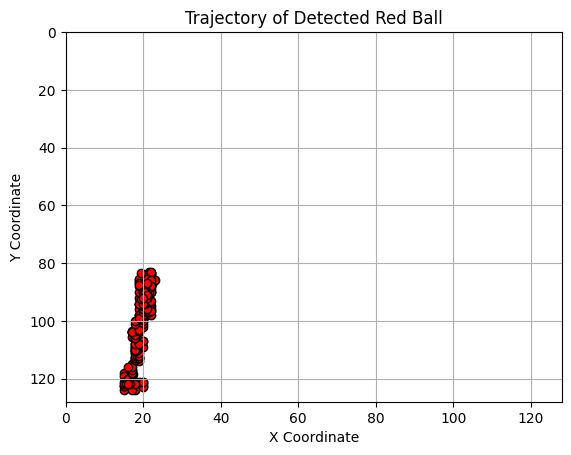

In [60]:
import matplotlib.pyplot as plt

# Plot the trajectory
plt.scatter(median_x, median_y, marker='o', linestyle='-', color='red', edgecolors='black', linewidth=1)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Trajectory of Detected Red Ball')

# Invert the y-axis if needed
plt.xlim(0,128)
plt.ylim(0,128)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
